In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, tree, model_selection, ensemble

In [3]:
digits = datasets.load_digits()

In [4]:
X = digits.data
y = digits.target

n_features = len(X[0])

In [5]:
classifier = tree.DecisionTreeClassifier()
cross_val_score_DT = model_selection.cross_val_score(classifier, X, y, cv=10).mean()
print(cross_val_score_DT)

0.8313438294200417


In [8]:
bagging_classifier = ensemble.BaggingClassifier(n_estimators=100)
cross_val_score_BC = model_selection.cross_val_score(bagging_classifier, X, y, cv=10, n_jobs=-1).mean()
print(cross_val_score_BC)

0.9232257827006997


In [9]:
classifier = tree.DecisionTreeClassifier()
bagging_classifier_sqrt = ensemble.BaggingClassifier(n_estimators=100, max_features = int(np.sqrt(n_features)))
cross_val_score_BC = model_selection.cross_val_score(bagging_classifier_sqrt, X, y, cv=10, n_jobs=-1).mean()
print(cross_val_score_BC)

0.9354744459282541


In [10]:
estimator = tree.DecisionTreeClassifier(max_features="sqrt")
bagging_classifier = ensemble.BaggingClassifier(base_estimator=estimator, n_estimators=100)
cross_val_score_BC = model_selection.cross_val_score(bagging_classifier, X, y, cv=10, n_jobs=-1).mean()
print(cross_val_score_BC)

0.9549843085347349


In [11]:
RF_classifier = ensemble.RandomForestClassifier(n_estimators=100)
cross_val_score_RF = model_selection.cross_val_score(RF_classifier, X, y, cv=10, n_jobs=-1).mean()
print(cross_val_score_RF)

0.9533573896452617


Text(0.5,0,'max_depth')

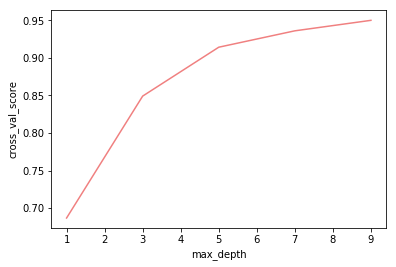

In [18]:
# как качество классификации зависит от ограничений на глубину дерева

max_depths = np.arange(1, 10, 2)
cross_val_scores = []

for max_depth in max_depths:
    RF_classifier = ensemble.RandomForestClassifier(n_estimators=100, max_depth=max_depth)
    cross_val_score_RF = model_selection.cross_val_score(RF_classifier, X, y, cv=10, n_jobs=-1).mean()
    cross_val_scores.append(cross_val_score_RF)

plt.plot(max_depths, cross_val_scores, color="lightcoral")
plt.ylabel("cross_val_score")
plt.xlabel("max_depth")

# чем больше глубина, тем лучше качество классификации

In [ ]:
 # как качество классификации зависит от количества признаков, выбираемых при построении каждой вершины дерева

n_max_features = np.arange(1, n_features+1, 7)
cross_val_scores = []

for num in n_max_features:
    RF_classifier = ensemble.RandomForestClassifier(max_features=num, n_estimators=100)
    cross_val_score_RF = model_selection.cross_val_score(RF_classifier, X, y, cv=10, n_jobs=-1).mean()
    cross_val_scores.append(cross_val_score_RF)
    
plt.plot(n_max_features, cross_val_scores, color="lightcoral")
plt.ylabel("cross_val_score")
plt.xlabel("n_max_features")

# от 0 до 8 растет, в 8 достигает своего максимума, затем падает 
# sqrt(n_features) == 8

In [19]:
# как качество классификации на данном датасете зависит от количества деревьев

n_trees = np.arange(1, 120, 10)
cross_val_scores = []

for num in n_trees:
    RF_classifier = ensemble.RandomForestClassifier(n_estimators=num)
    cross_val_score_RF = model_selection.cross_val_score(RF_classifier, X, y, cv=10, n_jobs).mean()
    cross_val_scores.append(cross_val_score_RF)
    
plt.plot(n_trees, cross_val_scores, color="lightcoral")
plt.ylabel("cross_val_score")
plt.xlabel("n_trees")

# при увеличении кол-ва деревьев, качество повышается
# а когда их становится достаточно много, почти не меняется

KeyboardInterrupt: 